1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  


The disintegration constant is: τ = 264.186315887587 s.
Every second the probability of decay is: p(1)= 0.0038


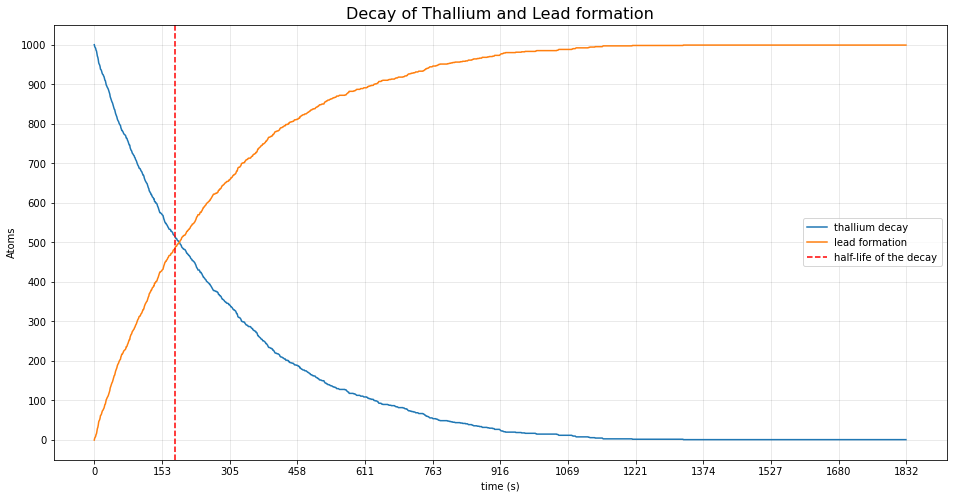

In [255]:
#beta- decay: Tl208->Pb208+e-
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
import math

half_life=183.12
tau=half_life/np.log(2)
print("The disintegration constant is: \u03C4 = "+str(tau)+" s.")
def p(t):
    return 1-2**(-t/half_life)
print("Every second the probability of decay is: p(1)=",round(p(1),4))
thallium=[1000]
lead=[0]
time=np.linspace(0,10*half_life+1,int(10*half_life))
for t in time:
    n=thallium[-1]
    if n<=0: 
        break
    caos=npr.random(size=n)
    n_decayed = np.sum(caos < p(1))
    thallium.append(n - n_decayed)
    lead.append(lead[-1] + n_decayed)

plt.figure(figsize=(16,8))
plt.plot(thallium, label="thallium decay")
plt.plot(lead, label="lead formation")
plt.title("Decay of Thallium and Lead formation", fontsize=16)
plt.axvline(half_life, color="r", linestyle="--", label="half-life of the decay")
time_small=np.linspace(0,10*half_life+1,13)
plt.xticks(time_small)
atoms_numb=np.linspace(0,1000,11)
plt.yticks(atoms_numb)
plt.xlabel("time (s)")
plt.ylabel("Atoms")
plt.grid(color='black', alpha=.1)
plt.legend(loc="best")

* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

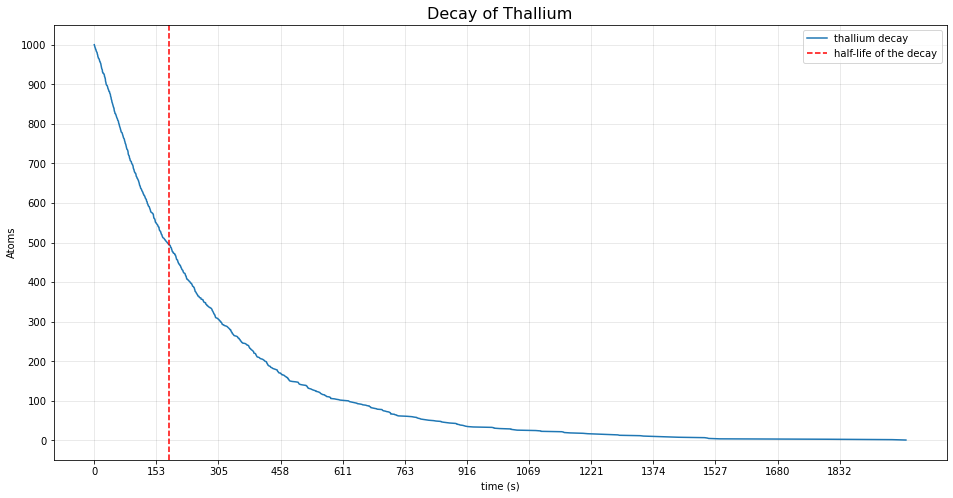

In [257]:
def icdf(z):
    t = -half_life/np.log(2)*np.log(1-z)
    return t

N=1000
thall=[icdf(np.random.uniform(0,1)) for i in range(N)]
thall=np.array(thall)
thall=np.sort(thall)            
    
plt.figure(figsize=(16,8))
plt.plot(thall,np.arange(len(thall), 0, -1), label="thallium decay")
plt.title("Decay of Thallium", fontsize=16)
plt.axvline(half_life, color="r", linestyle="--", label="half-life of the decay")
time_small=np.linspace(0,10*half_life+1,13)
plt.xticks(time_small)
atoms_numb=np.linspace(0,1000,11)
plt.yticks(atoms_numb)
plt.xlabel("time (s)")
plt.ylabel("Atoms")
plt.grid(color='black', alpha=.1)
plt.legend(loc="best")

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [258]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

def scatt(b):
    Z = 79
    e = 1.6*(10**(-19))
    E = 1.23*(10**(-12))
    e0 = 8.85*(10**(-12))  
    return (Z*e*e)/(2*np.pi*e0*E*b)

a_0=5.29*(10**(-11))
n_particles=10**6

#2-D gaussian representation of beam in terms of impact parameter coordinates 
x=np.random.normal(0,a_0/100,n_particles)
y=np.random.normal(0,a_0/100,n_particles)
b=[]
for x,y in zip(x,y):
    r=((x**2)+(y**2))**0.5
    b.append(r)
b=np.array(b)

thetas=scatt(b)
count=np.sum(thetas>1)
bounce_back_fraction=count/n_particles
bounced_particles=bounce_back_fraction*n_particles
print("The fraction of particles that bounce back is:", bounce_back_fraction,", which means",bounced_particles,"particles out of 10^6.")


The fraction of particles that bounce back is: 0.001599 , which means 1599.0 particles out of 10^6.


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate


In [210]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr

def f(x):
    return (np.sin(1/(x*(2-x))))**2
I_ref=1.4514
n=100000
count=0
for i in range(n):
    x=np.random.random()
    y=np.random.random()
    if y<f(x): 
        count+=1
I1=2*count/n
error1=(np.abs(I_ref-I1)/I_ref)*100
print("The true value of the integral is:", round(I_ref,4))
print("The value obtained with the hit/miss method is:",round(I1,4))
print("The percentual error is:", round(error1,4),"%")

The true value of the integral is: 1.4514
The value obtained with the hit/miss method is: 1.4495
The percentual error is: 0.1309 %


* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [211]:
I_n=0
for i in range(n):
    x=np.random.random()
    I_n+=f(x)
I2=2*I_n/n
error2=(np.abs(I_ref-I2)/I_ref)*100
print("the value obtained with the mean value method is:",round(I2,4))
print("The relative error is:", round(error2,4),"%")
print("The mean value method generally return a smaller error, so it's preferable.")

the value obtained with the mean value method is: 1.4509
The relative error is: 0.0344 %
The two strategies are comparables, they returns similar errors.


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [241]:
import numpy as np
import numpy.random as npr

def Area (d, n):
    x = npr.random(size=(n,d))-1
    r = np.sum(np.power(x,2), axis=1)
    V = (2**d)*np.sum(r<=1)/n
    return V
true2=3.142
true10=2.550
A2=Area(2,1000000)
A10=Area(10,1000000)
print("The area of a circle of unit radius is:",A2,"\nthe percentual error is:",round(np.abs(true2-A2)/true2*100,4),"%")
print("For a 10D sphere, the volume is:",A10,"\nthe percentual error is:",round(np.abs(true10-A10)/true10*100,4),"%")

The area of a circle of unit radius is: 3.139204 
the percentual error is: 0.089 %
For a 10D sphere, the volume is: 2.574336 
the percentual error is: 0.9544 %


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [240]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

I_rif=0.8389329600 #true value of the integral
n=100000
x=stats.powerlaw(0.5).rvs(n)
I=(1.0/n)*np.sum((x**(-0.5))/(np.exp(x)+1)*1/(stats.powerlaw(0.5).pdf(x)))
error= np.abs(I-I_rif)/I_rif
print("The true value of the integral is:", round(I_rif,5))
print("The integral calculated returns:", round(I,5))
print("The relative error is:", round(error,5))


The true value of the integral is: 0.83893
The integral calculated returns: 0.83887
The relative error is: 8e-05
